In [4]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

Random Forest R²: 0.5255
Random Forest Mean Absolute Error (MAE): 2912.9908
Random Forest Root Mean Squared Error (RMSE): 25972.1426


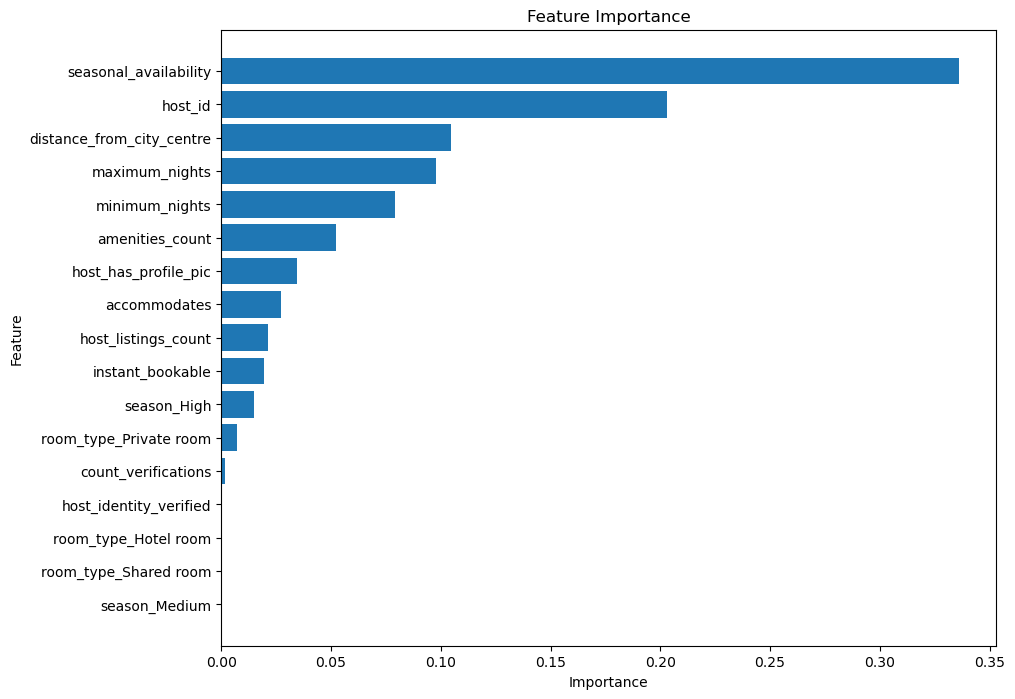

,Feature,Importance
10,seasonal_availability,0.336212
0,host_id,0.203107
11,distance_from_city_centre,0.104705
6,maximum_nights,0.097975
5,minimum_nights,0.079150
8,amenities_count,0.052408
2,host_has_profile_pic,0.034325
4,accommodates,0.027204
1,host_listings_count,0.021208
7,instant_bookable,0.019342


In [6]:

# loading the data
data_path = 'C:/Users/filip/OneDrive - Vysoká škola ekonomická v Praze/Plocha/DATA X/data_for_model.pck'
data = pd.read_pickle(data_path)

# target variable
target_variable = 'price'  

# drop rows with missing target variable values
data = data.dropna(subset=[target_variable])

# separate features and target variable
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# remove columns with any missing values
X = X.dropna(axis=1, how='any')

# one hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predictions for the test set
y_pred_rf = rf.predict(X_test)

# calculating r2 for random forest
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest R²: {r2_rf:.4f}')

# display attribute importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# plotting the attributes importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#
feature_importances.head(10)


